In [1]:
import cv2
import yaml
import random
from pathlib import Path
import matplotlib.pyplot as plt

# Load the data configuration file
with open('../configs/data.yaml', 'r') as f:
    data_cfg = yaml.safe_load(f)

# Construct the path to the training images and labels
train_img_path = Path('../' + data_cfg['train'])
train_lbl_path = train_img_path.parent / '../labels'

# Get a list of all image files in the training directory
image_files = list(train_img_path.glob('*.jpg'))
print(f"Found {len(image_files)} images in the training set.")

Found 2586 images in the training set.


In [2]:
# This will print the exact path the script is trying to use
print("The script is looking for images in:")
print(train_img_path.resolve())

The script is looking for images in:
/Users/masih/Desktop/Masih/WorkSpace/lp-det/data/lp/train/images


In [3]:
def draw_yolo_box(image, label_path):
    h, w, _ = image.shape
    try:
        with open(label_path, 'r') as f:
            line = f.readline()
            if not line: return image 

            class_id, x_center, y_center, width, height = map(float, line.split())

            # De-normalize coordinates back to pixel values
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            
            # Draw the box and label
            cv2.rectangle(image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
            class_name = data_cfg['names'][int(class_id)]
            cv2.putText(image, class_name, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    except Exception as e:
        print(f"Error processing {label_path.name}: {e}")
    return image

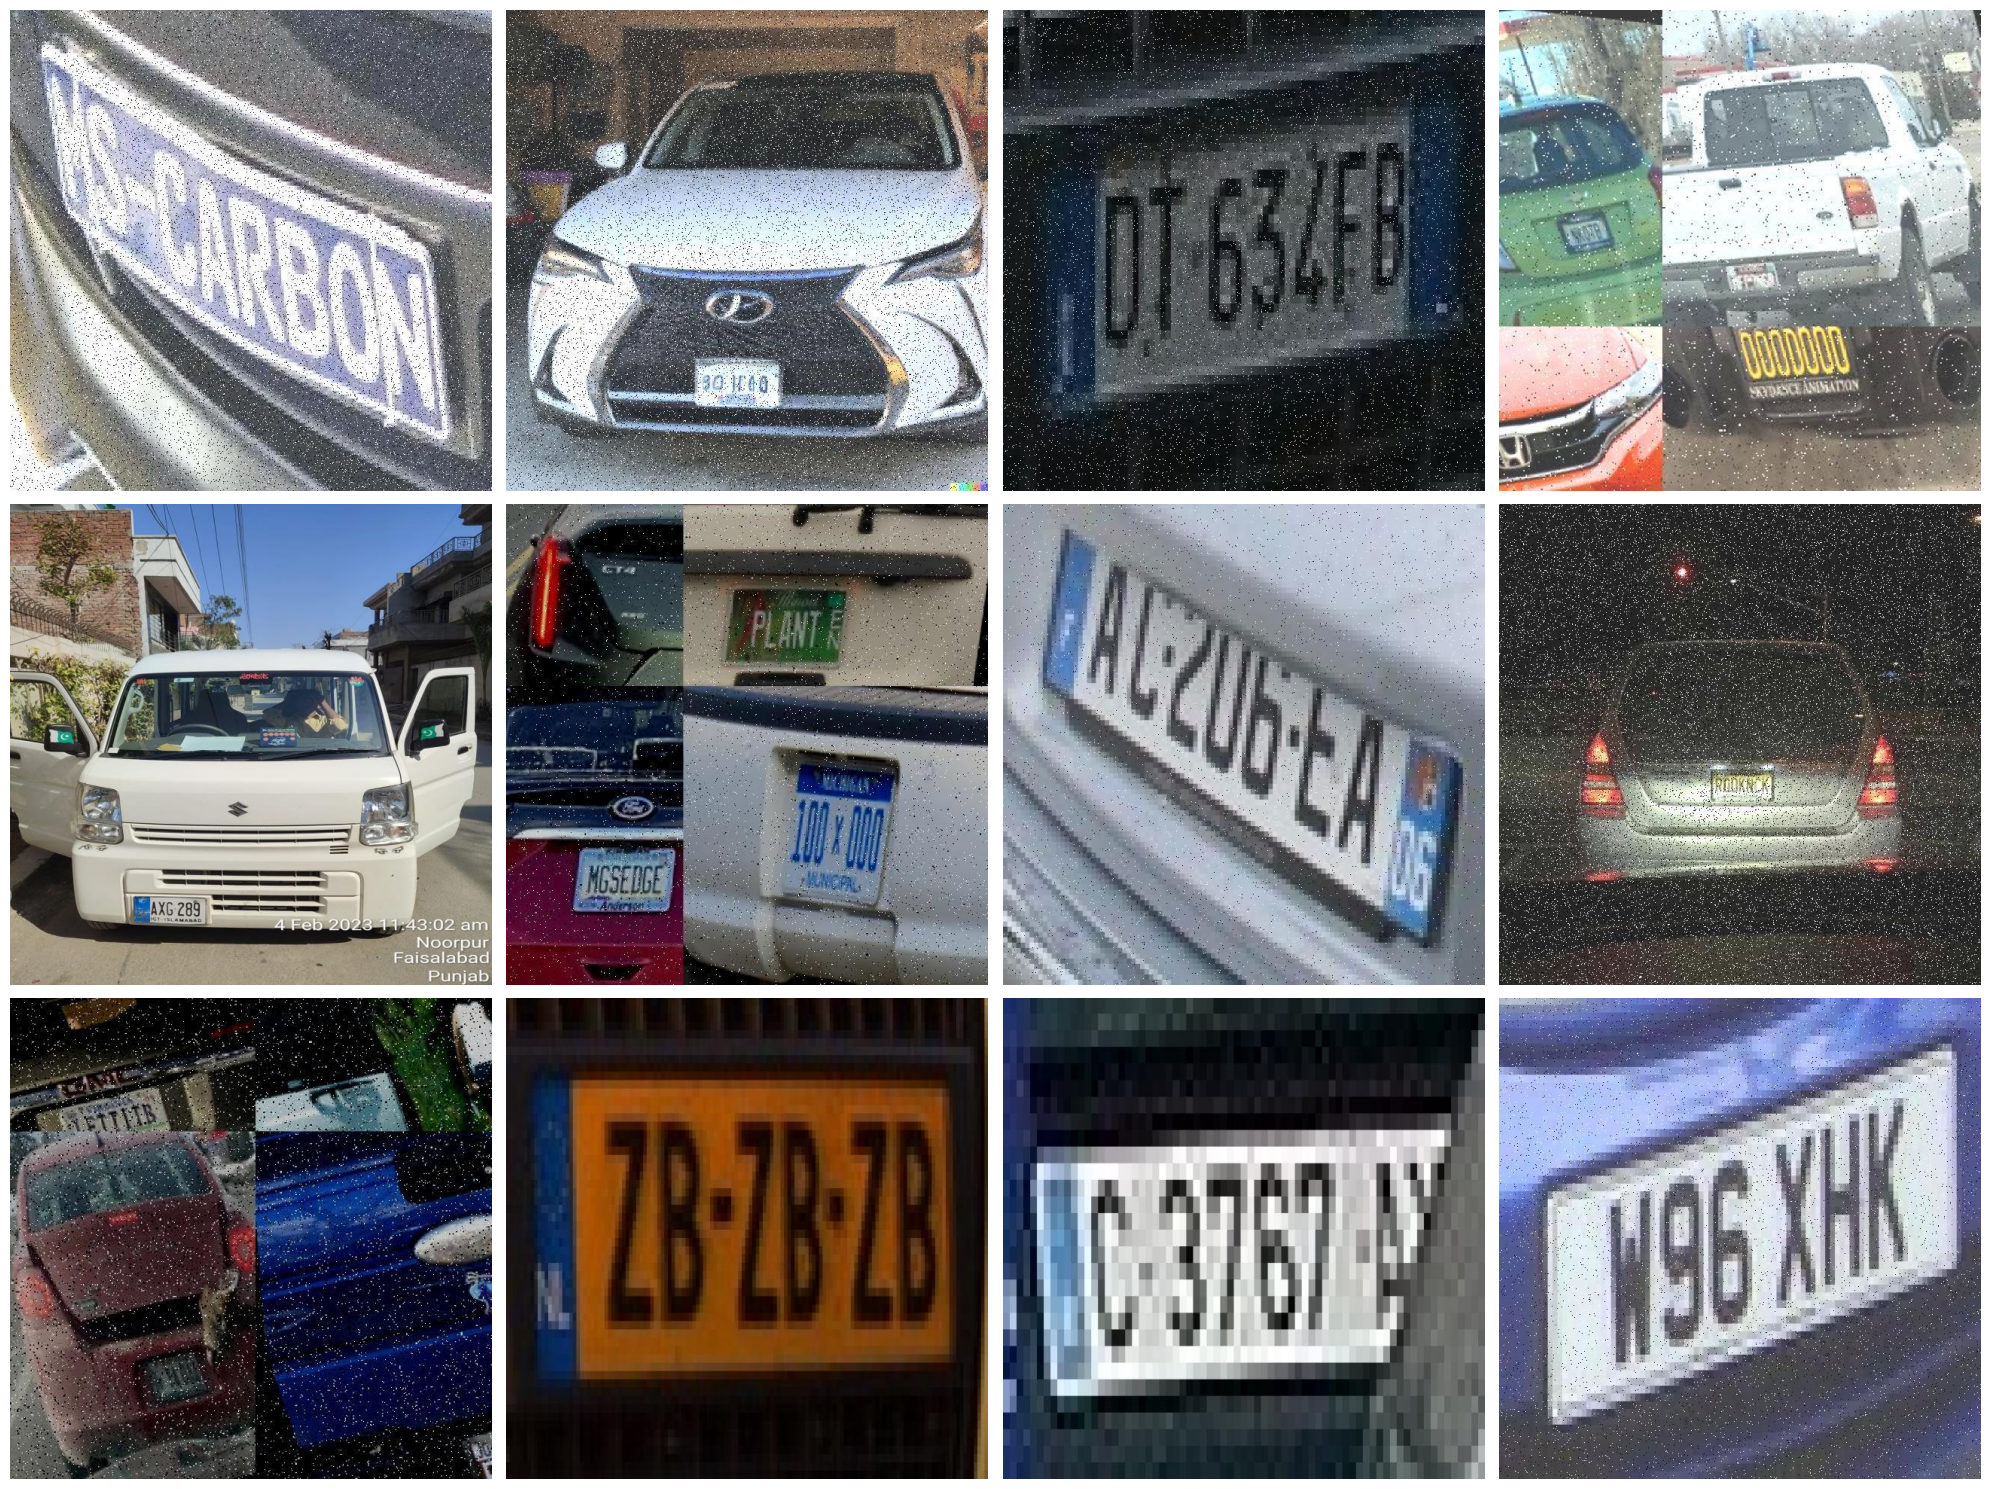

In [4]:
plt.figure(figsize=(20, 15))

# Randomly sample 12 images
num_samples = min(12, len(image_files))
random_samples = random.sample(image_files, k=num_samples)

for i, img_file in enumerate(random_samples):
    label_file = train_lbl_path / f"{img_file.stem}.txt"
    image = cv2.imread(str(img_file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert for matplotlib

    if label_file.exists():
        image_with_box = draw_yolo_box(image, label_file)
    else:
        image_with_box = image
    
    plt.subplot(3, 4, i + 1)
    plt.imshow(image_with_box)
    plt.axis('off')

plt.tight_layout()
plt.show()